# Maaslin 2 Analysis 
###  COVIRT19 microbial subgroup seqscreen analysis 
#### Date : 21 DEC 2020 
#### Maintained by :
    Jochum, Michael D. 
    Baylor College of Medicine 
    michael.jochum@bcm.edu

#### The purpose of this code is to:
- identify GO terms assocaited with COVID19 via maaslin2

- load the libraries
- set the environment
- import the data from the dmm clustering analysis

In [1]:
library(tidyverse)
library(phyloseq)
library(Maaslin2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [5]:
setwd('/home/jovyan/work/microbial/GO_term_analysis/16_DEC_2020_dmm_troubleshooting_Lee/')

In [216]:
load(file = "./images/1_dmm.RDA")

Transform GO Terms counts to relative abundances

In [217]:
term_pseq_no_neg_comp<-microbiome::transform(x = term_pseq_no_neg,transform = "compositional")

In [218]:
library(microbiome)

# MaAsLIN2

In [219]:
df_input_data<-data.frame(t(otu_table(term_pseq_no_neg_comp)))
df_input_metadata<-data.frame(sample_data(term_pseq_no_neg_comp))

In [220]:
dim(df_input_data)

[1]    86 13534

[1] "Warning: Deleting existing log file: ./results/terms_vs_case_comp_norm/maaslin2.log"
2021-02-09 20:16:36 INFO::Writing function arguments to log file
2021-02-09 20:16:36 INFO::Verifying options selected are valid
2021-02-09 20:16:36 INFO::Determining format of input files
2021-02-09 20:16:36 INFO::Input format is data samples as rows and metadata samples as rows
2021-02-09 20:16:37 INFO::Formula for random effects: expr ~ (1 | sample_name) + (1 | publication)
2021-02-09 20:16:37 INFO::Formula for fixed effects: expr ~  case
2021-02-09 20:16:37 INFO::Filter data based on min abundance and min prevalence
2021-02-09 20:16:37 INFO::Total samples in data: 86
2021-02-09 20:16:37 INFO::Min samples required with min abundance for a feature not to be filtered: 8.600000
2021-02-09 20:16:37 INFO::Total filtered features: 13493
2021-02-09 20:16:37 INFO::Filtered feature names from abundance and prevalence filtering: GO.0000002.mitochondrial.genome.maintenance.mitochondrial.genome.maintenance,

2021-02-09 20:17:29 INFO::Writing association plots (one for each significant association) to output folder: ./results/terms_vs_case_comp_norm
2021-02-09 20:17:29 INFO::Plotting associations from most to least significant, grouped by metadata
2021-02-09 20:17:29 INFO::Plotting data for metadata number 1, case
2021-02-09 20:17:29 INFO::Creating boxplot for categorical data, case vs GO.0009987.cellular.process.cellular.process
2021-02-09 20:17:29 INFO::Creating boxplot for categorical data, case vs GO.0016787.hydrolase.activity.hydrolase.activity
2021-02-09 20:17:29 INFO::Creating boxplot for categorical data, case vs GO.0008152.metabolic.process.metabolic.process
2021-02-09 20:17:29 INFO::Creating boxplot for categorical data, case vs GO.0016740.transferase.activity.transferase.activity
2021-02-09 20:17:29 INFO::Creating boxplot for categorical data, case vs GO.0009987.cellular.process.cellular.process
2021-02-09 20:17:30 INFO::Creating boxplot for categorical data, case vs GO.0016787.h

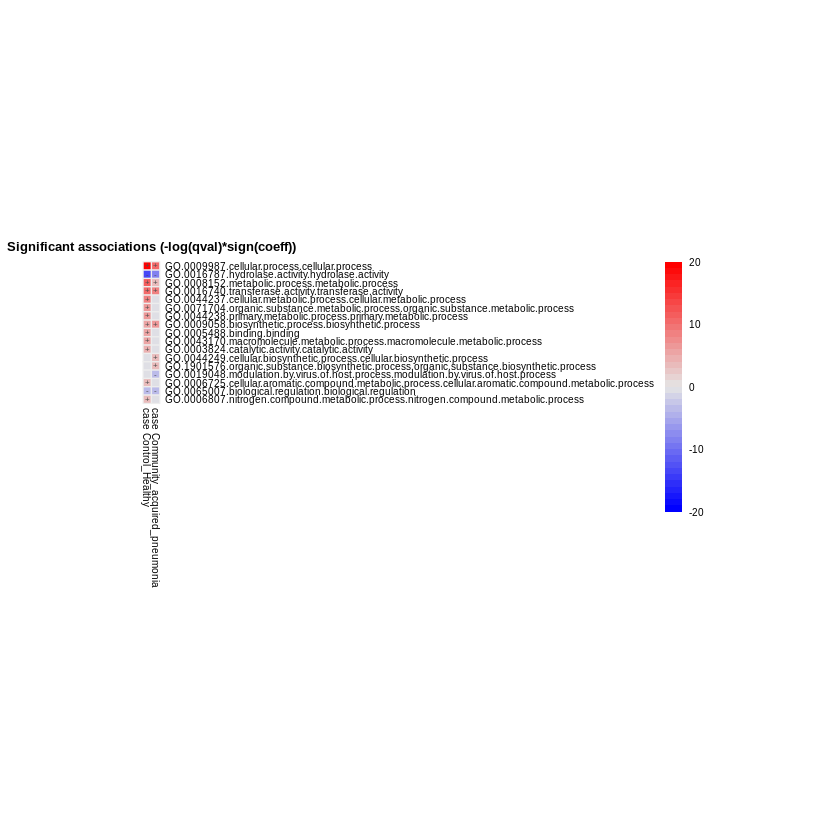

In [222]:
case_norm<-Maaslin2(
  input_data = df_input_data,
  input_metadata = df_input_metadata,
  output="./results/terms_vs_case_comp_norm",
  min_abundance = 0.01, 
  min_prevalence = 0.1, 
  normalization = "CLR",
  transform = "NONE",
  analysis_method = "CPLM",
  max_significance = 0.05,
  random_effects = c("sample_name","publication"),
  fixed_effects = c("case"),
  correction="BH",
  standardize = TRUE,
  cores = 48,
  plot_heatmap = TRUE,
  plot_scatter = TRUE,
  heatmap_first_n =num,
 reference="case,COVID19")

## MaAsLin2 outcome analyisis (subsampled)

In [224]:
term_pseq_outcome<-subset_samples(physeq = term_pseq_no_neg,outcome!="NA")
x<-sample_sums(term_pseq_outcome)
y<-as_tibble(x,,rownames="sample")%>%arrange(value)
meta<-as_tibble(meta(term_pseq_outcome),rownames="sample")

Joining, by = "sample"



min    Q1      median   Q3        max         mean       sd         n  missing
 183618 5779611 33248570 620866974 13243465603 1247393179 3437936482 25 0

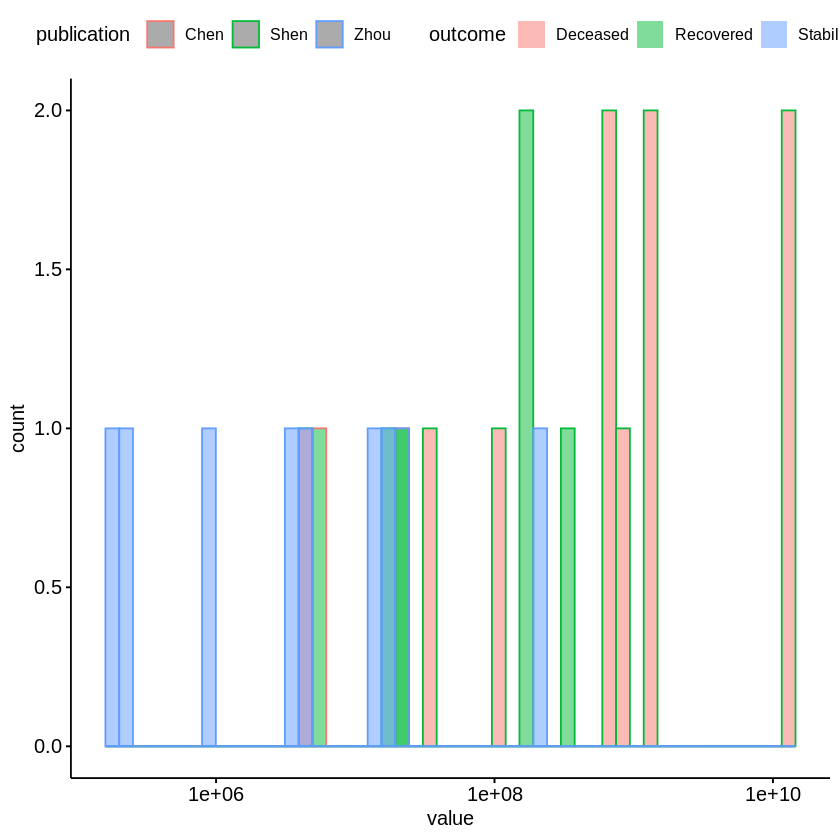

In [225]:
y<-full_join(y,meta)
library(ggpubr)
gghistogram(data = y,x = "value",y = "..count..",color = "publication",fill = "outcome",bins = 50)+xscale("log10")
# library(mosaic)
 favstats(data = y,x = y$value)

In [226]:
meta<-meta(term_pseq_outcome)
meta$outcome<-gsub("Stabilized","Survived",meta$outcome)
meta$outcome<-gsub("Recovered","Survived",meta$outcome)
sample_data(term_pseq_outcome)<-sample_data(meta)

In [227]:
term_pseq_outcome_core<-prune_taxa(taxa_sums(term_pseq_outcome)>10,term_pseq_outcome)
term_pseq_outcome
term_pseq_outcome_core

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 13534 taxa and 25 samples ]
sample_data() Sample Data:       [ 25 samples by 71 sample variables ]
tax_table()   Taxonomy Table:    [ 13534 taxa by 3 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9155 taxa and 25 samples ]
sample_data() Sample Data:       [ 25 samples by 71 sample variables ]
tax_table()   Taxonomy Table:    [ 9155 taxa by 3 taxonomic ranks ]

In [228]:
term_pseq_outcome_comp<-microbiome::transform(x = term_pseq_outcome_core,transform = "compositional")

In [229]:
COVID19_df_input_data<-data.frame(t(otu_table(term_pseq_outcome_comp)))
COVID19_df_input_metadata<-data.frame(sample_data(term_pseq_outcome_comp))

In [230]:
# range(taxa_sums(term_pseq_outcome_core))
# range(taxa_sums(term_pseq_outcome_comp))

#### run another model using only the COVID19 samples and identify GO Terms associated with deceased vs survived

In [236]:
subset_outcome<-Maaslin2(
  input_data = COVID19_df_input_data,
  input_metadata = COVID19_df_input_metadata,
  output="./results/subset_outcome",
  min_abundance = 0.00001, 
  min_prevalence = 0.1,  #test only features with at least 10% non-zero values. min 2.5samples to be run
  normalization = "CLR",
  transform = "NONE",
  analysis_method = "CPLM",
  max_significance = 0.05,
  random_effects = c('reads','publication'),
  fixed_effects = c("outcome"),
  correction="BH",
  standardize = TRUE,
  cores = 48,
  plot_heatmap = TRUE,
  plot_scatter = TRUE,
  heatmap_first_n =num)

[1] "Warning: Deleting existing log file: ./results/subset_outcome/maaslin2.log"
2021-02-09 20:36:43 INFO::Writing function arguments to log file
2021-02-09 20:36:43 INFO::Verifying options selected are valid
2021-02-09 20:36:43 INFO::Determining format of input files
2021-02-09 20:36:43 INFO::Input format is data samples as rows and metadata samples as rows
2021-02-09 20:36:43 INFO::Formula for random effects: expr ~ (1 | reads) + (1 | publication)
2021-02-09 20:36:43 INFO::Formula for fixed effects: expr ~  outcome
2021-02-09 20:36:43 INFO::Filter data based on min abundance and min prevalence
2021-02-09 20:36:43 INFO::Total samples in data: 25
2021-02-09 20:36:43 INFO::Min samples required with min abundance for a feature not to be filtered: 2.500000
2021-02-09 20:36:43 INFO::Total filtered features: 6591
2021-02-09 20:36:43 INFO::Filtered feature names from abundance and prevalence filtering: GO.0000002.mitochondrial.genome.maintenance.mitochondrial.genome.maintenance, GO.0000003.r

2021-02-09 20:43:00 INFO::Creating boxplot for categorical data, outcome vs GO.0034654.nucleobase.containing.compound.biosynthetic.process.nucleobase.containing.compound.biosynthetic.process
2021-02-09 20:43:00 INFO::Creating boxplot for categorical data, outcome vs GO.0046914.transition.metal.ion.binding.transition.metal.ion.binding
2021-02-09 20:43:00 INFO::Creating boxplot for categorical data, outcome vs GO.0019438.aromatic.compound.biosynthetic.process.aromatic.compound.biosynthetic.process
2021-02-09 20:43:00 INFO::Creating boxplot for categorical data, outcome vs GO.0018130.heterocycle.biosynthetic.process.heterocycle.biosynthetic.process
2021-02-09 20:43:00 INFO::Creating boxplot for categorical data, outcome vs GO.0009059.macromolecule.biosynthetic.process.macromolecule.biosynthetic.process
2021-02-09 20:43:00 INFO::Creating boxplot for categorical data, outcome vs GO.0016070.RNA.metabolic.process.RNA.metabolic.process
2021-02-09 20:43:00 INFO::Creating boxplot for categorical

In [245]:
res<-case_norm$results%>%filter(pval<=0.05)
subset_outcome_res<-subset_outcome$results%>%filter(pval<=0.05)
write.table(subset_outcome_res,"subset_outcome_res.tsv", sep="\t", row.names=F)

In [111]:
Terms<-gsub("GO.","GO:",res$feature)
Terms<-gsub("[.]"," ",Terms)
Terms<-sub(" ","-",Terms)
Terms<-as_tibble(Terms)
Terms<-separate(data = Terms,col = value,sep = "-",into =  c("Term", "name"))

In [112]:
term_pseq_prune <- prune_taxa(taxa = Terms$Term,x =term_pseq_no_neg_gonames)
term_pseq_prune #[85 taxa and 141 samples ]
tax<-data.frame(tax_table(term_pseq_prune))
names<-paste(rownames(tax),tax$name,sep="-")
taxa_names(term_pseq_prune)<-names

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 35 taxa and 86 samples ]
sample_data() Sample Data:       [ 86 samples by 72 sample variables ]
tax_table()   Taxonomy Table:    [ 35 taxa by 3 taxonomic ranks ]

In [113]:
save.image("./images/2_maaslin2.rda")